In [1]:
library(tidyverse)
library(repr)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [55]:
players_data <- read_csv("data/players.csv")
sessions_data <- read_csv("data/sessions.csv")
head(players_data)
head(sessions_data)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


Data Description: 
-

- In the players dataset, there are 196 observations, with 7 variables (experience, subscribe, hashedEmail, played_hours, name, gender, and Age.
- Experience, name, and gender are character variables, played_hours and Age are numerical variables (dbl), and subscribe is a logical variable (lgl)
- In the Sessions dataset, there are 1535 observations, with 5 variables (hashedEmail, start_time, end_time, origional_start_time, and origional_end_time)
- hashedEmail, start_time, and end_time are character variables (chr). origional_start_time and origional_end_time are numerical variables(dbl)
- All variables are straightforward, but the start and end time variables are unusual. The start_time and end_time variables are written in "normal" format, whereas the origional_start_time and origional_end_time are written in standardized format which will allow us to graph more easily.
- There are 2 main problems that could arise. Firstly, in the players dataset, most entries are less than 25 played_hours, but there are a number of outliers that are well above 150. These outliers should be included in our analysis, but it may make reading certain plots very difficult. Secondly, there are some entries with zero hours of playtime. These are also important to keep because they represent important data, however it is important to note that they may skew the data. 



Questions:
-

Does experience or subscription status predict played_hours in players.csv dataset?

I will create bar graphs with either subscription status or experience on the x-axis and average played_hours on the y-axis. This will allows us to easily visualize trends present in the dataset

Exploratory Data Analysis and Visualization
-

In [19]:
mean_table <- players_data |>
  summarise(across(where(is.numeric), ~mean(.x, na.rm = TRUE)))

mean_table

played_hours,Age
<dbl>,<dbl>
5.845918,21.13918


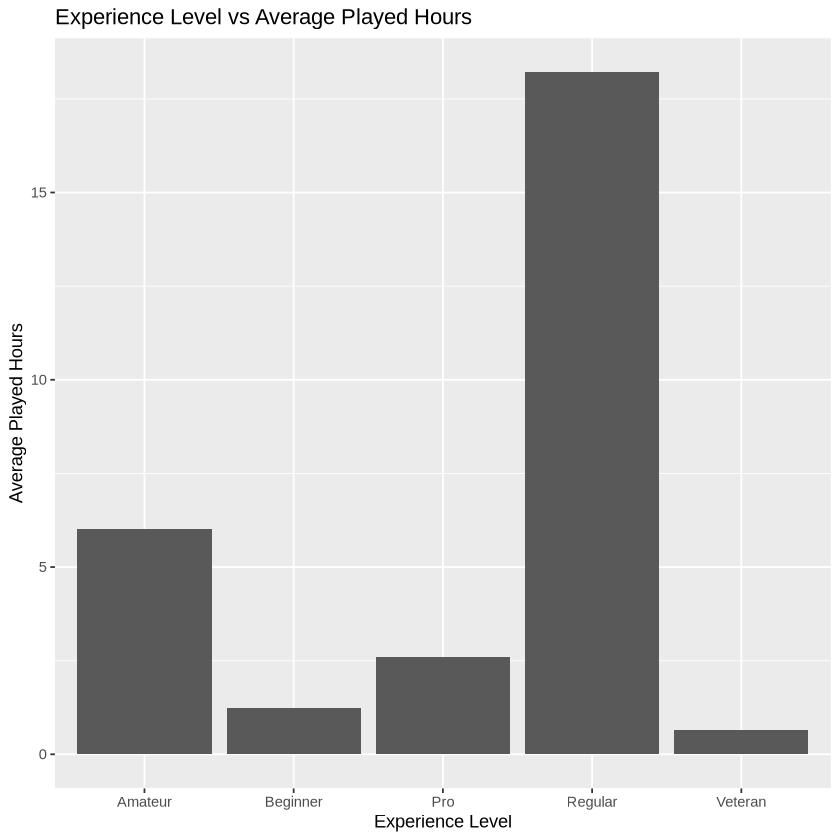

In [51]:
avg_hours <- players_data |>
  group_by(experience) |>
  summarise(mean_played_hours = mean(played_hours, na.rm = TRUE))

avg_hours_plot <- ggplot(avg_hours, aes(x = experience, y = mean_played_hours)) +
  geom_bar(stat = "identity") +
  labs(x = "Experience Level",
    y = "Average Played Hours",
      title = "Experience Level vs Average Played Hours")
avg_hours_plot

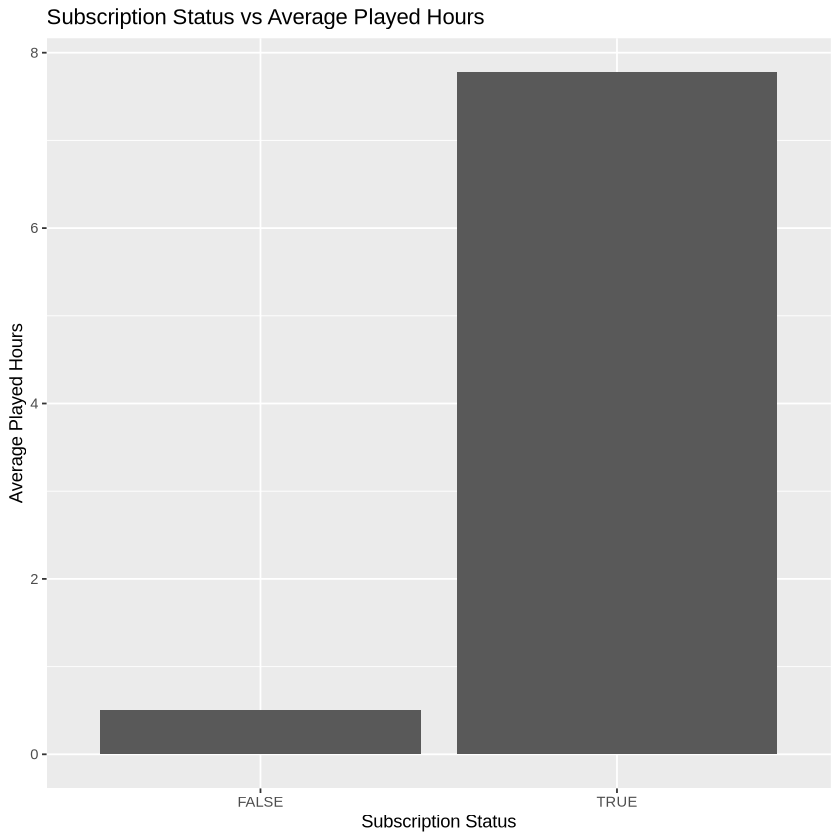

In [53]:
avg_sub <- players_data |>
  group_by(subscribe) |>
  summarise(mean_played_hours = mean(played_hours, na.rm = TRUE))

avg_sub_plot <- ggplot(avg_sub, aes(x = subscribe, y = mean_played_hours)) +
  geom_bar(stat = "identity") +
  labs(x = "Subscription Status",
    y = "Average Played Hours",
      title = "Subscription Status vs Average Played Hours")
avg_sub_plot

In the experience level vs average played hours plot, we can see that Regular players tended to play the most, and veterans tended to play the least. 

In the subscription status vs average played hours plot, we can see that players who were subscribed, on average, played significantly more than players that were not subscribed. 

Methods and Plan
-

Since the data we wish to predict is quantitative, we can use a regression-based approach. Some of the relevant assumptions are linearity, independence, and normally distributed residuals. One key weakness could be categorical imbalance. I fear this could pose a significant challenge, especially when analyzing experience (players.csv), because certain groups may have significantly fewer observations. This is an important issue because if not rectified, it will greatly impact the accuracy of our test. I will first start by comparing the model using experience and subscription status predictors. I will then add or remove other categorical predictors depending on the results to increase the test's robustness. I will convert the categorical variables into factors, then assess their validity (ensuring they are relatively equal in number). To properly train the model, I will use a standard 0.75:0.25 split. Lastly, the data will be validated using the unseen testing set. If the model provides accurate predictions based on the testing set, it is ready for use.

GitHub link: https://github.com/danialshaikh13/project_planning.git
